<a href="https://colab.research.google.com/github/ehom/colab_notebooks/blob/main/CNN-in-TensorFlow/C2_W1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cat and Dogs


In [18]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Click the button on top that says, `Open in Colab`, to run this notebook as a Colab. Running the notebook on your local machine might result in some of the code blocks throwing errors.

In [19]:
# In this exercise, you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs

import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [20]:
!ls /tmp/cats-v-dogs
!rm -rf /tmp/cats-v-dogs
!ls /tmp/cats-v-dogs

testing  training
ls: cannot access '/tmp/cats-v-dogs': No such file or directory


In [21]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2021-12-05 08:15:33--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.220.136.113, 2600:1402:6800:297::e59, 2600:1402:6800:283::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.220.136.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   123MB/s    in 6.5s    

2021-12-05 08:15:39 (121 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [22]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [23]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    classes = ['cats','dogs']
  
    for class_name in classes:
      os.makedirs("/tmp/cats-v-dogs/training/{}".format(class_name), exist_ok = True)
      os.makedirs("/tmp/cats-v-dogs/testing/{}".format(class_name), exist_ok = True)
except OSError:
    pass



In [24]:
!ls -R /tmp/cats-v-dogs

/tmp/cats-v-dogs:
testing  training

/tmp/cats-v-dogs/testing:
cats  dogs

/tmp/cats-v-dogs/testing/cats:

/tmp/cats-v-dogs/testing/dogs:

/tmp/cats-v-dogs/training:
cats  dogs

/tmp/cats-v-dogs/training/cats:

/tmp/cats-v-dogs/training/dogs:


In [28]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list

class Helper:
  def copy(filenames, source, target):
    for filename in filenames:
        source_path = os.path.join(source, filename)
        target_path = os.path.join(target, filename)
        if (os.path.getsize(source_path) > 0):
            copyfile(source_path, target_path)
        else:
          print("{} is zero length, so ignoring".format(source_path))


def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  from pathlib import Path
    
  source_path = Path(SOURCE)
  files = os.listdir(source_path)
  
  # PrettyPrinter(indent=4).pprint(files)

  files = random.sample(files, len(files))
  total = len(files)
  print("original:", total)

  total = 1500

  training_count = int(total * SPLIT_SIZE)
  print(training_count)

  # copy to training
  print("number of files to training area:", len(files[0:training_count]))
  Helper.copy(files[0:training_count], SOURCE, TRAINING)
  
  # copy to testing
  test_count = total - training_count
  print("number of files to test area:", len(files[training_count:training_count + test_count]))
  Helper.copy(files[training_count:training_count + test_count], SOURCE, TESTING)

  ### END CODE HERE

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

class Dirs:
  CAT_TRAINING = "/tmp/cats-v-dogs/training/cats/"
  DOG_TRAINING = "/tmp/cats-v-dogs/training/dogs/"
  CAT_TESTING = "/tmp/cats-v-dogs/testing/cats/"
  DOG_TESTING = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

original: 12501
1350
number of files to training area: 1350
number of files to test area: 150
original: 12501
1350
number of files to training area: 1350
number of files to test area: 150


In [29]:
print("Total training cat images:", len(os.listdir(Dirs.CAT_TRAINING)))
print("Total training dog images:", len(os.listdir(Dirs.DOG_TRAINING)))
print("Total validation cat images", len(os.listdir(Dirs.CAT_TESTING)))
print("Total validation dog images:", len(os.listdir(Dirs.DOG_TESTING)))

# Expected output:
# 11250
# 11250
# 1250
# 1250

Total training cat images: 2558
Total training dog images: 2540
Total validation cat images 298
Total validation dog images: 298


In [30]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

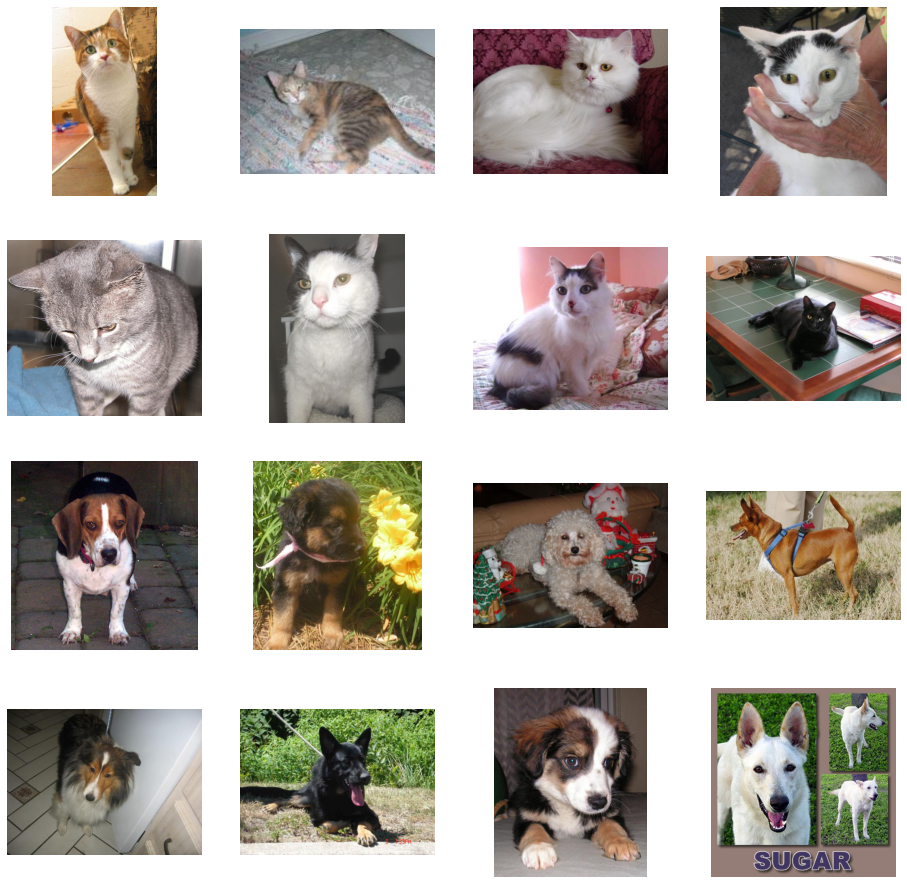

In [31]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

train_cats_dir = "/tmp/cats-v-dogs/training/cats"
train_cat_fnames = os.listdir(train_cats_dir)

train_dogs_dir = "/tmp/cats-v-dogs/training/dogs"
train_dog_fnames = os.listdir(train_dogs_dir)

next_cat_pix = [
  os.path.join(train_cats_dir, fname) 
    for fname in train_cat_fnames[pic_index - 8: pic_index] 
]

next_dog_pix = [
  os.path.join(train_dogs_dir, fname) 
  for fname in train_dog_fnames[pic_index - 8: pic_index]
]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [32]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
    ### START CODE HERE
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid') 
    ### END CODE HERE
])

model.summary()

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [33]:
TRAINING_DIR = '/tmp/cats-v-dogs/training'
train_datagen = ImageDataGenerator(rescale = 1.0/255.0)

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 10,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

VALIDATION_DIR = '/tmp/cats-v-dogs/testing'
validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                        batch_size = 10,
                                                        class_mode  = 'binary',
                                                        target_size = (150, 150))



# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 5098 images belonging to 2 classes.
Found 596 images belonging to 2 classes.


Note: You can ignore the `UserWarning: Possibly corrupt EXIF data.` warnings.

In [36]:
history = model.fit(
    train_generator,
    epochs = 2,
    verbose = 1,
    validation_data = validation_generator
)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/2
510/510 [==============================] - 162s 317ms/step - loss: 0.6335 - accuracy: 0.6518 - val_loss: 0.6271 - val_accuracy: 0.6594
Epoch 2/2
510/510 [==============================] - 164s 321ms/step - loss: 0.5339 - accuracy: 0.7413 - val_loss: 0.5579 - val_accuracy: 0.7215


Text(0.5, 1.0, 'Training and validation loss')

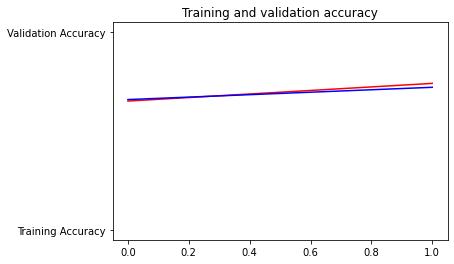

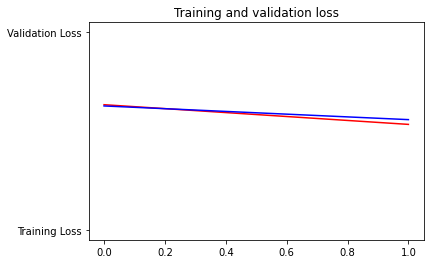

In [37]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

**Important Note:** Due to some compatibility issues, the following code block will result in an error after you select the images(s) to upload if you are running this notebook as a `Colab` on the `Safari` browser. For `all other broswers`, continue with the next code block and ignore the next one after it.

The ones running the `Colab` on `Safari`, comment out the code block below, uncomment the next code block and run it.

In [16]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size = (150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(classes[0])

  if classes[0] > 0.5:
    print("{} is a dog".format(fn))
  else:
    print("{} is a cat".format(fn))


For those running this `Colab` on `Safari` broswer can upload the images(s) manually. Follow the instructions, uncomment the code block below and run it.

Instructions on how to upload image(s) manually in a Colab:

1. Select the `folder` icon on the left `menu bar`.
2. Click on the `folder with an arrow pointing upwards` named `..`
3. Click on the `folder` named `tmp`.
4. Inside of the `tmp` folder, `create a new folder` called `images`. You'll see the `New folder` option by clicking the `3 vertical dots` menu button next to the `tmp` folder.
5. Inside of the new `images` folder, upload an image(s) of your choice, preferably of either a horse or a human. Drag and drop the images(s) on top of the `images` folder.
6. Uncomment and run the code block below. 

In [52]:
# import numpy as np
# from keras.preprocessing import image
# import os

# images = os.listdir("/tmp/images")

# print(images)

# for i in images:
#  print()
#  # predicting images
#  path = '/tmp/images/' + i
#  img = image.load_img(path, target_size=(150, 150))
#  x = image.img_to_array(img)
#  x = np.expand_dims(x, axis=0)

#  images = np.vstack([x])
#  classes = model.predict(images, batch_size=10)
#  print(classes[0])
#  if classes[0]>0.5:
#    print(i + " is a dog")
#  else:
#    print(i + " is a cat")